In [75]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read in data
df = pd.read_csv(r'C:\Users\Chris\Documents\Data Analytics Project\Movies Analysis Project\Dataset\movies.csv')

In [102]:
# examine movies data
df.head()

In [79]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [80]:
# drop rows with missing data
df = df.dropna()


# Check for missing data again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [78]:
# get datatypes for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
# change budget and gross datatype to int to remove .0 format
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



In [83]:
# year of release and year column is different for some movies
# create yearcorrect column for correct release year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)



In [84]:
df = df.sort_values( by = ['gross'], inplace = False , ascending = False)

In [48]:
pd.set_option('display.max_rows', None)

In [86]:
# drop any duplicates
df = df.drop_duplicates()

In [ ]:
# check correlation of fields with gross field
# get correlation matrix
# result : correlaton coefficent between gross and budget is 0.74 indicating a positive correlation between the fields,
# for votes field, a correlation coefficient of 0.61 with gross indicating a positive correlation

df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

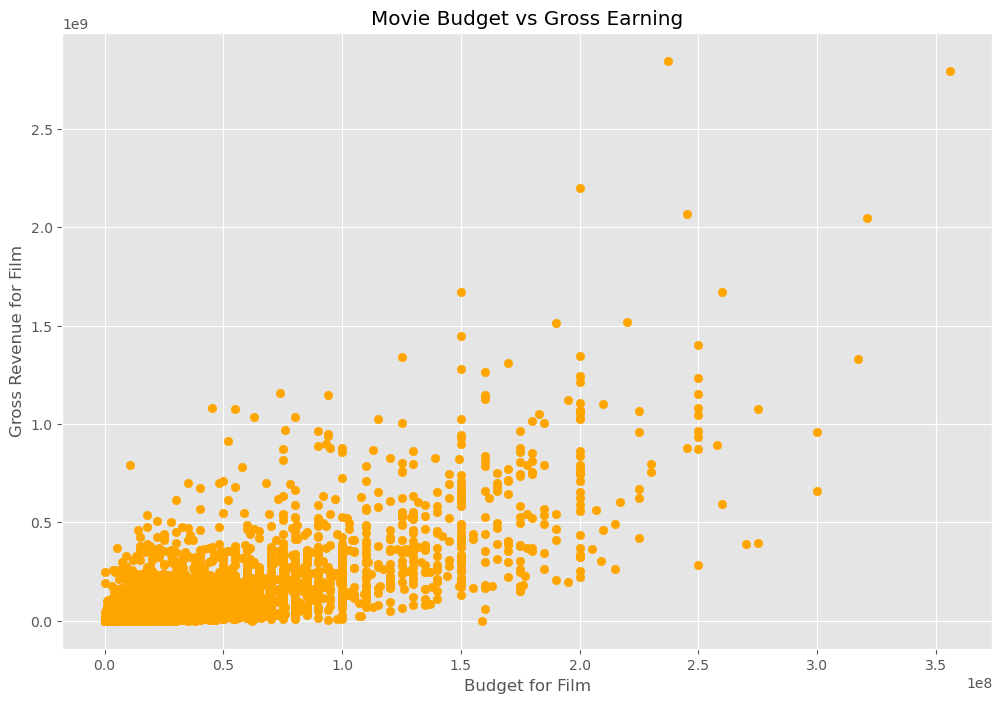

In [65]:
# scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'], c = 'orange')
plt.title('Movie Budget vs Gross Earning')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue for Film')


plt.show

Text(0.5, 1.0, 'Movie Budget VS Gross Revenue')

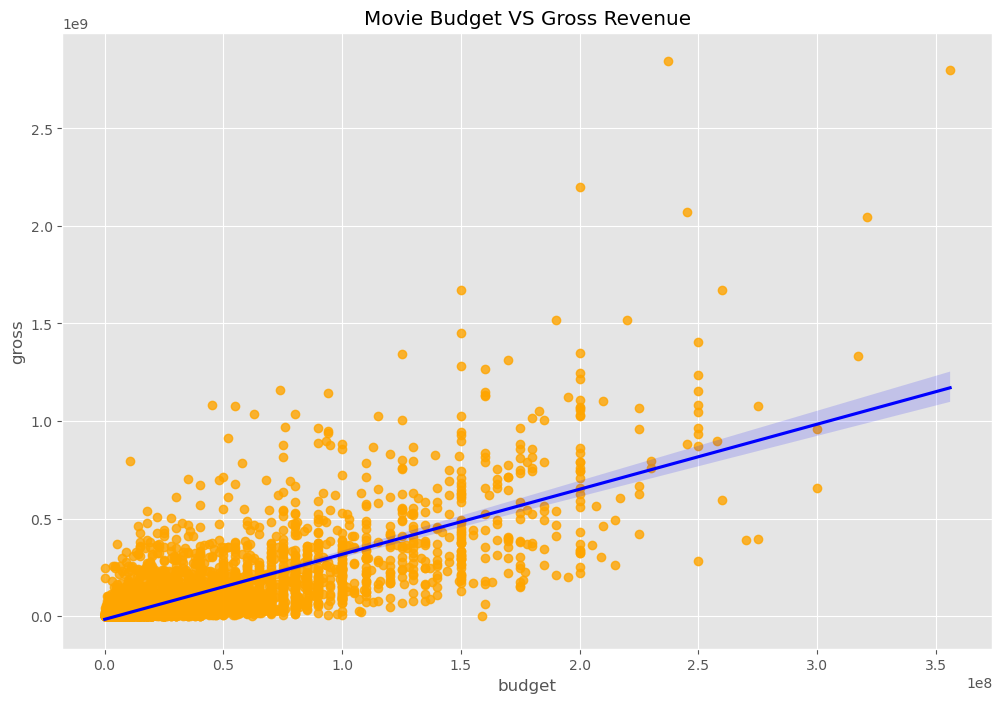

In [99]:
# plot budget vs gross with a regression line using Seaborn 
# suggests positive correlation between budget and gross revenue

budget_gross_regp = sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"orange"}, line_kws = {"color": "blue"})
budget_gross_regp.set_title('Movie Budget VS Gross Revenue')

Text(0.5, 1.0, 'Movie Votes VS Gross Revenue')

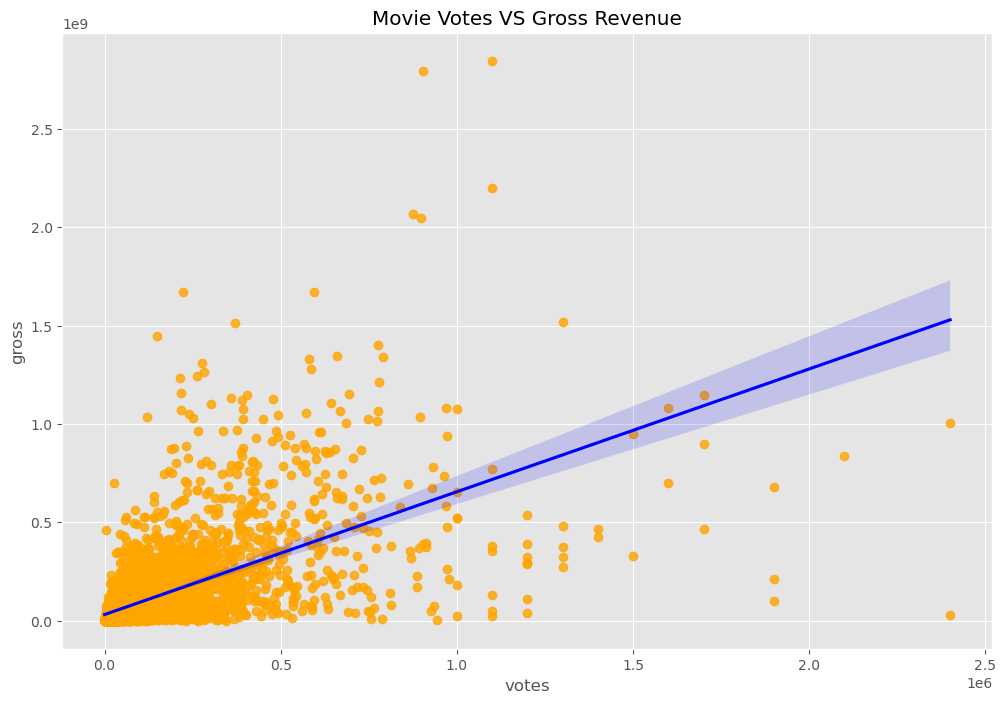

In [100]:
# plot budget vs gross with a regression line using Seaborn 
# suggests positive correlation between budget and gross revenue

votes_gross_regp = sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {"color":"orange"}, line_kws = {"color": "blue"})
votes_gross_regp.set_title('Movie Votes VS Gross Revenue')

<function matplotlib.pyplot.show(close=None, block=None)>

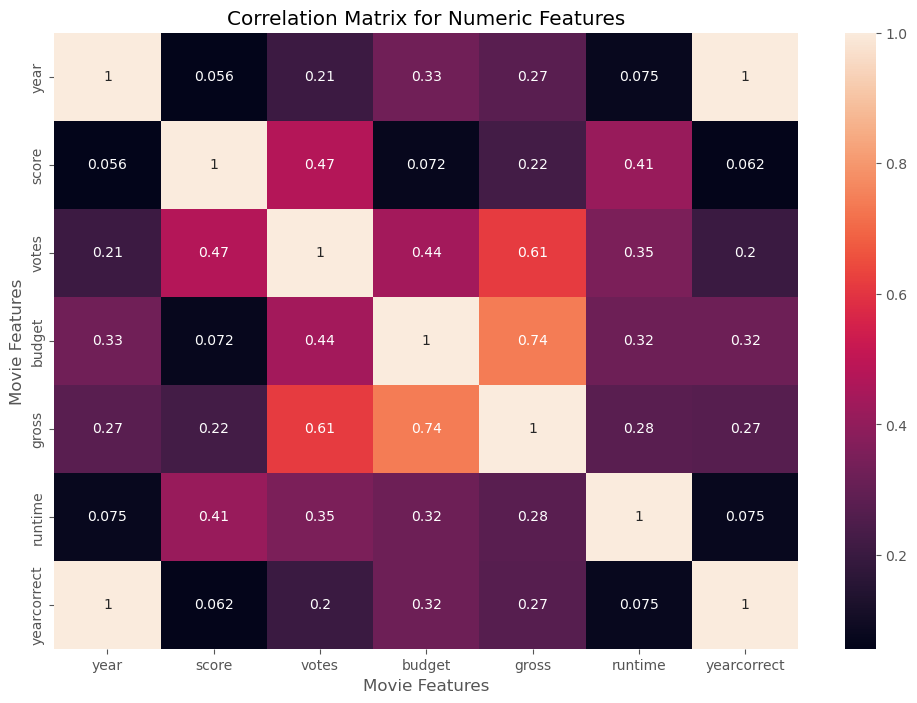

In [70]:
# Correlaton matrix shows that the strongest correlations with gross is budget and votes.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [89]:
# make deep copy of df
df_numerized = df.copy() 

# change string fields to categorical type for correlation evaluation with gross
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
7480  4388       4      2  2019      1126    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       165    7.1   370000.0       809     481   
7494  1530       4      2  2019      2053    6.8   148000.0       277    1383   
6644   387       5      0  2015      1712    7.3   777000.0      1060    1646   
7247   567       5      0  2018       723    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000.0       452    2862   
7075  3644       5      0  2017       500    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000.0       764     777   
6262  1529       4      2  2013      2082    7.4   585000.0       277    1383   
7072   477       4      7  2017      1561    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1325    7.6   263000.0       193     327   
7055  4119       5      0  2017        45    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1881    7.1   779000.0      1767     837   
6688  2545       4      2  2015      1050    6.4   218000.0      1144     362   
6846   750       5      0  2016      1910    7.8   694000.0       105     513   
7250   343       5      0  2018       565    6.9   404000.0       809     699   
4245  4407       5      0  2003       516    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000.0      1019     479   
7456   755       5      0  2019      1697    6.8   478000.0        96     182   
5878  4950       5      0  2011      1442    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2148    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1394    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       553    6.5   394000.0       768     489   
7450  2091       6      5  2019      2321    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000.0       674    2927   
6869  3260       5      0  2016       509    7.8   572000.0       615     492   
7481   206       4      1  2019      1837    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1803    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1292    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000.0        81     153   
3451  3637       4      0  1999      1778    6.5   748000.0       653    1046   
5667   215       4      1  2010      1679    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000.0       239     390   
6045  4240       5      1  2012       492    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1987    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

<function matplotlib.pyplot.show(close=None, block=None)>

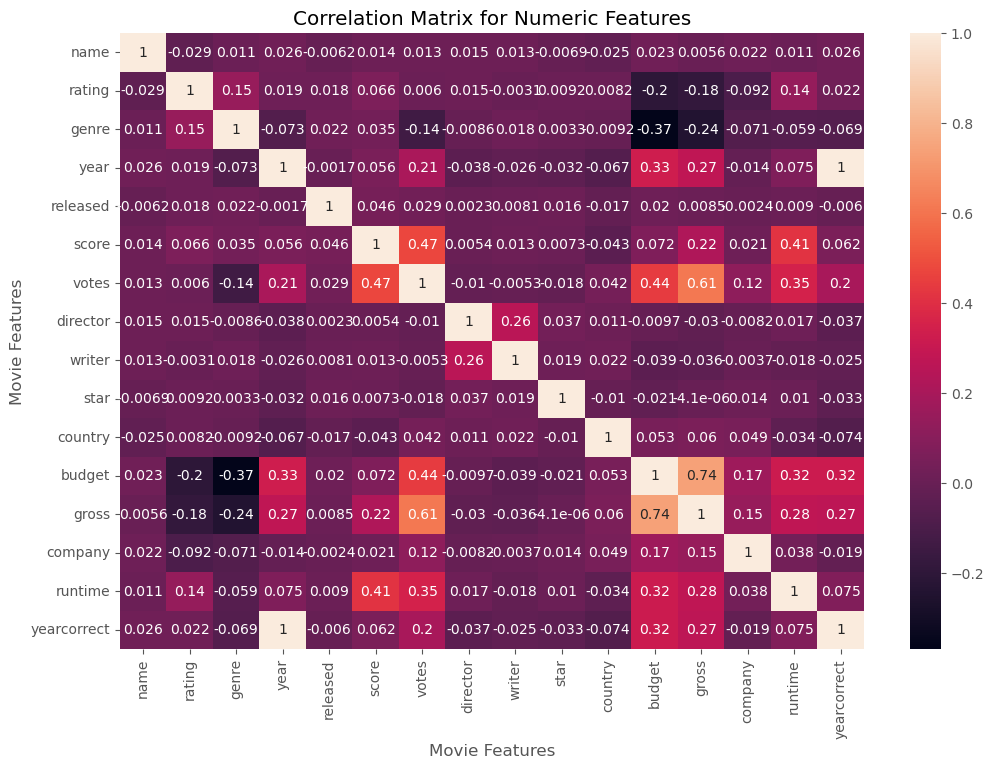

In [91]:
# produce heatmap correlation matrix for df with the included categorical conversions
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [95]:
# unstack and sort correlation values
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [96]:
# filter for correlation coefficients greater than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Analysis Results: # movie budget and votes are the variables that have the strongest correlation with a movie's gross revenue